<a href="https://colab.research.google.com/github/josemoragonzalez/ejemplosColab/blob/master/GastoClasificaci%C3%B3nFuncional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Segundo ejercicio con Colab 

In [2]:
# Librerias necesarias para el análisis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
# Descarga de archivo
dfbruto = pd.read_excel('https://www.dipres.gob.cl/598/articles-45401_doc_xls_Funcional2.xlsx')

In [35]:
#------------------------------------------------------
## EXTRACCIÓN DE REGISTROS VALIOSOS PARA EL ANÁLISIS
#------------------------------------------------------

# Extracción de filas que contienen la información de gasto
dfcolumns = dfbruto.iloc[4].fillna(0).astype(int)
dfSPG = dfbruto.iloc[9:15]
dfD = dfbruto.iloc[17:19]
dfOPS = dfbruto.iloc[21:26]
dfAE = dfbruto.iloc[28:37]
dfPMA = dfbruto.iloc[39:42]
dfVSC = dfbruto.iloc[44:48]
dfS = dfbruto.iloc[50:55]
dfARCR = dfbruto.iloc[57:59]
dfE = dfbruto.iloc[61:66]
dfPS = dfbruto.iloc[68:76]

# Lista de dfs
listadfs = [dfSPG, dfD, dfOPS, dfAE, dfPMA, dfVSC, dfS, dfARCR, dfE, dfPS]

# Nombres de dfs
nombresdfs = [dfbruto.iloc[8,1], dfbruto.iloc[16,1], dfbruto.iloc[20,1], dfbruto.iloc[27,1], dfbruto.iloc[38,1], dfbruto.iloc[43,1],
              dfbruto.iloc[49,1], dfbruto.iloc[56,1], dfbruto.iloc[60,1], dfbruto.iloc[67,1]]

In [29]:
# Creamos el Dataframe con la unión de todos los elementos anteriores
dfgasto = pd.DataFrame()

# La unión la hacemos a través de un loop sobre la lista de dfs, añadiendo una columnas con el nombre de la clasificación de cada df
for i, row in enumerate(listadfs):
  row['Clasificación'] = nombresdfs[i]
  dfgasto = dfgasto.append(row)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [54]:
#--------------------------------------------------------------------------------
# Establecemos los nombres de las columnas y elaboramos una lista con los años
#--------------------------------------------------------------------------------

# Establece los nommbres de columnas
nombcols = dfcolumns.to_list()
nombcols[0] = 'Código'
nombcols[1] = 'Subclasificación'
nombcols.append('Clasificación')
dfgasto.columns = nombcols

# Se crea una lista con los años usando los nombres de las columnas
no_anios = ['Código', 'Subclasificación', 'Clasificación']  
columnas = [n for n in nombcols if n not in no_anios] 

In [56]:
# Cambiar la forma de la matriz a un formato de tabla larga
dfgasto_t = pd.melt(dfgasto, id_vars=['Código', 'Clasificación', 'Subclasificación'], value_vars=columnas)

,Código,Clasificación,Subclasificación,variable,value
0,7011,Servicios Públicos Generales,"Org. Ejecutivos y Legislat., Asuntos Financ., ...",1990,3.278834e+05
1,7012,Servicios Públicos Generales,Ayuda Económica Exterior,1990,0.000000e+00
2,7013,Servicios Públicos Generales,Servicios Generales,1990,9.223830e+04
3,7014,Servicios Públicos Generales,Investigación Básica,1990,2.196869e+04
4,7016,Servicios Públicos Generales,Servicios Públicos Generales n.e.p.,1990,1.083564e+04
...,...,...,...,...,...
1465,7105,Protección Social,Desempleo,2019,1.043700e+05
1466,7106,Protección Social,Vivienda,2019,2.085669e+06
1467,7107,Protección Social,Exclusión Social,2019,2.725595e+05
1468,7108,Protección Social,Investigación y Desarrollo relacionados con Pr...,2019,7.408654e+04


Text(0.5, 1.0, 'Evolución anual de gasto gobierno central por Item de Estado de Operaciones, millones de pesos 2019')

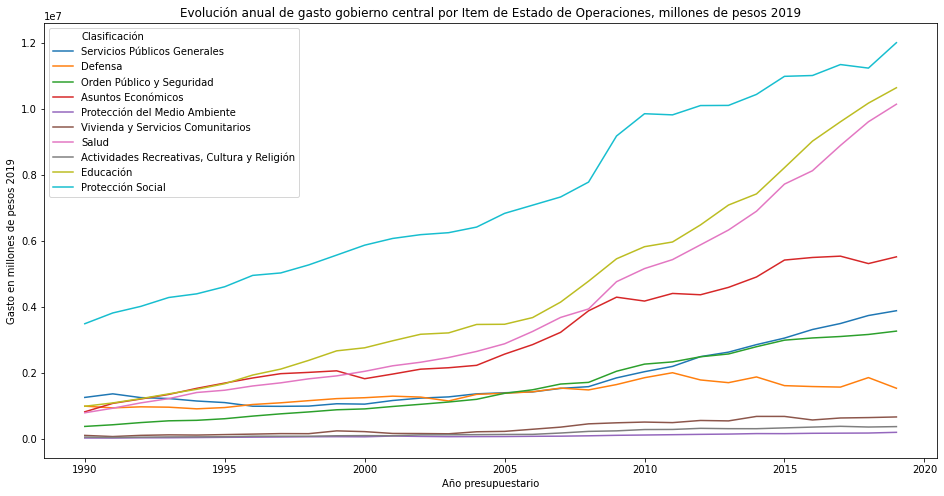

In [72]:
# Graficar eevolución usando un lineplot de seaborn
plt.figure(figsize=(16,8))
ax = sns.lineplot(x='variable', y='value', data=dfgasto_t, estimator=sum, ci=None, hue='Clasificación')
ax.set_ylabel('Gasto en millones de pesos 2019')
ax.set_xlabel('Año presupuestario')
ax.set_title('Evolución anual de gasto gobierno central por Item de Estado de Operaciones, millones de pesos 2019')

In [81]:
# Establecer el peso porcentual por año de cada Item
dfgasto_p = dfgasto.set_index(['Clasificación', 'Subclasificación']).drop(columns=['Código'])
dfgasto_p = dfgasto_p.divide(dfgasto_p.sum(), axis=1)

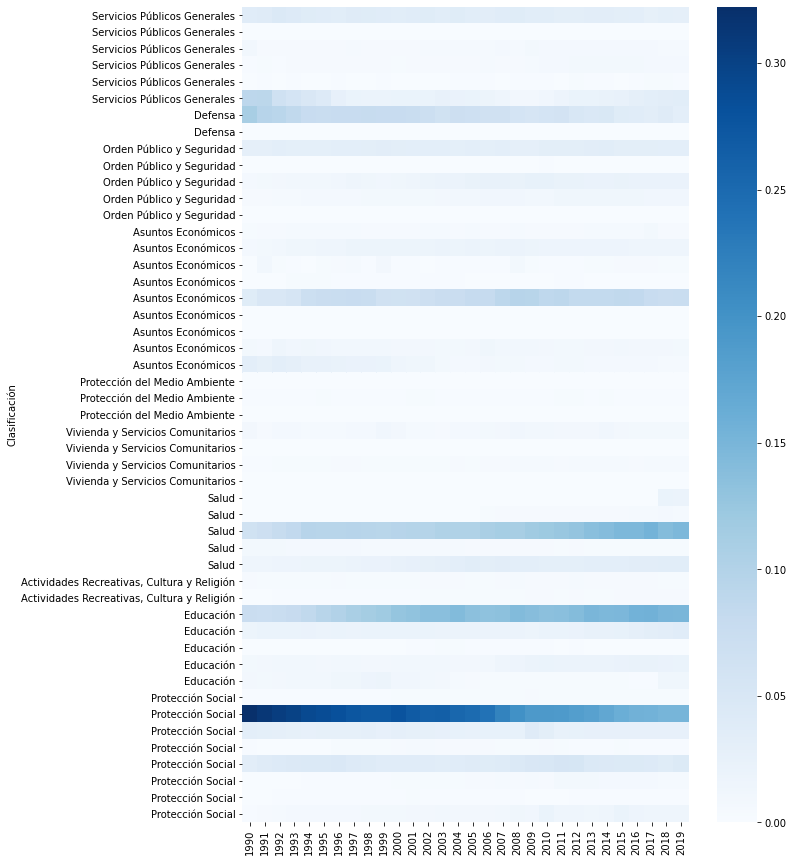

In [80]:
# Graficar heatmap para ver concentraciones de importancia de cada item, y su evolución en el tiempo
plt.figure(figsize=(10,15))
ax = sns.heatmap(dfgasto_p,cmap="Blues")
plt.show()